In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier


from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc

from sklearn import preprocessing

In [ ]:
models = []
accuracy = []
f1 = []
def score(model: str, test, predicted):
    print(f"Model: {model}")
    models.append(model) # adding the values in the models list
    # Calculate accuracy_LR
    accuracy_LR = accuracy_score(test, predicted)
    accuracy.append(round(accuracy_LR*100, 2)) # adding the values in the accuracy list
    print("\naccuracy_LR:", round(accuracy_LR*100, 2), "%")

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(test, predicted)

    # precision, recall, f1, roc
    precision_LR = round(precision_score(test,predicted)*100, 2)
    recall_LR = round(recall_score(test,predicted)*100,2)
    f1_LR = round(f1_score(test,predicted)*100,2)
    f1.append(f1_LR) # adding the values in the f1 list
    roc_LR = round(roc_auc_score(test,predicted)*100,2)

    print("\nPrecision: ",precision_LR,'%')
    print("Recall score: ",recall_LR,'%')
    print("F1 Score:", f1_LR,'%')
    print("ROC score: ",roc_LR,'%')

    # showing the confusion matrix in heatmap
    plt.figure(figsize=(3, 3))
    sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm")
    plt.title(f"{model}")  # Set the title to include the model name
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab files/Pre process/Python_LongMethodSmell_Dataset.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                894 non-null    int64  
 1   lloc               894 non-null    int64  
 2   scloc              894 non-null    int64  
 3   comments           894 non-null    int64  
 4   single_comments    894 non-null    int64  
 5   multi_comments     894 non-null    int64  
 6   blanks             894 non-null    int64  
 7   h1                 894 non-null    int64  
 8   h2                 894 non-null    int64  
 9   n1                 894 non-null    int64  
 10  n2                 894 non-null    int64  
 11  vocabulary         894 non-null    int64  
 12  length             894 non-null    int64  
 13  calculated_length  894 non-null    float64
 14  volume             894 non-null    float64
 15  difficulty         894 non-null    float64
 16  effort             894 non

In [ ]:
#There is a column without name,So, first naming it.
data = data.rename(columns={'Unnamed: 0': 'index'})

In [ ]:
#Droping the columns which are not related to the output
#data = data.drop(['index','Sl. No','Patient File No.'],axis=1)

In [ ]:
data.head()

,loc,lloc,scloc,comments,single_comments,multi_comments,blanks,h1,h2,n1,n2,vocabulary,length,calculated_length,volume,difficulty,effort,time,bugs,Experince Based
0,235,131,136,9,9,60,30,7,35,21,41,42,62,199.176390,334.323680,4.100000,1370.727089,76.151505,0.111441,1
1,162,64,67,20,20,49,26,9,28,19,38,37,57,163.135263,296.938842,6.107143,1813.447927,100.747107,0.098980,1
2,56,49,47,2,1,0,8,7,27,20,37,34,57,148.033447,289.985382,4.796296,1390.855813,77.269767,0.096662,1
3,49,23,45,3,3,0,1,1,3,2,4,4,6,4.754888,12.000000,0.666667,8.000000,0.444444,0.004000,1
4,166,128,119,23,23,0,24,15,76,58,109,91,167,533.445850,1086.801705,10.756579,11690.268340,649.459352,0.362267,1


In [ ]:
print(data.head())  # Display the first few rows of the dataframe
print(data.columns)  # Display all column names in the dataframe


   loc  lloc  scloc  comments  single_comments  multi_comments  blanks  h1  \
0  235   131    136         9                9              60      30   7   
1  162    64     67        20               20              49      26   9   
2   56    49     47         2                1               0       8   7   
3   49    23     45         3                3               0       1   1   
4  166   128    119        23               23               0      24  15   

   h2  n1   n2  vocabulary  length  calculated_length       volume  \
0  35  21   41          42      62         199.176390   334.323680   
1  28  19   38          37      57         163.135263   296.938842   
2  27  20   37          34      57         148.033447   289.985382   
3   3   2    4           4       6           4.754888    12.000000   
4  76  58  109          91     167         533.445850  1086.801705   

   difficulty        effort        time      bugs  Experince Based   
0    4.100000   1370.727089   76.151505 

In [ ]:
# Separate the features (X) and the target variable (y)
x = data.drop(columns=['Experince Based '])  # Keep all columns in features (X)
y = data['Experince Based ']  # Set the specified column as the target variable


# Applying Mutual info for finding better features from the dataset

In [ ]:
print(len(x), len(y))


894 894


In [ ]:
#x.reset_index(drop=True, inplace=True)
#y.reset_index(drop=True, inplace=True)


In [ ]:
# Compute mutual information between each feature and the target variable
mutual_info = mutual_info_classif(x, y)

In [ ]:
# Create a DataFrame to store feature names and their corresponding mutual information scores
mi_scores = pd.Series(mutual_info, index=x.columns).sort_values(ascending=False)

# Print the mutual information scores for each feature
mi_scores

scloc                0.413060
lloc                 0.362507
loc                  0.274244
calculated_length    0.254747
length               0.253486
effort               0.247768
time                 0.244564
h2                   0.238567
volume               0.238145
n1                   0.238026
bugs                 0.235705
vocabulary           0.233448
n2                   0.229307
difficulty           0.178037
h1                   0.171674
comments             0.129634
blanks               0.114427
single_comments      0.089421
multi_comments       0.086764
dtype: float64

In [ ]:
top_10_features = mi_scores.index[:19]  # Select the first 12 indices
#top_10_features = top_10_features[top_10_features != 13]  # Remove the 13th index if it exists
X = x[top_10_features]  # Use the selected features to create a new DataFrame or array


In [ ]:
X.head()

,scloc,lloc,loc,calculated_length,length,effort,time,h2,volume,n1,bugs,vocabulary,n2,difficulty,h1,comments,blanks,single_comments,multi_comments
0,136,131,235,199.176390,62,1370.727089,76.151505,35,334.323680,21,0.111441,42,41,4.100000,7,9,30,9,60
1,67,64,162,163.135263,57,1813.447927,100.747107,28,296.938842,19,0.098980,37,38,6.107143,9,20,26,20,49
2,47,49,56,148.033447,57,1390.855813,77.269767,27,289.985382,20,0.096662,34,37,4.796296,7,2,8,1,0
3,45,23,49,4.754888,6,8.000000,0.444444,3,12.000000,2,0.004000,4,4,0.666667,1,3,1,3,0
4,119,128,166,533.445850,167,11690.268340,649.459352,76,1086.801705,58,0.362267,91,109,10.756579,15,23,24,23,0


In [ ]:
# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [ ]:
# Standard Scaler applying for better prediction
x_train = preprocessing.StandardScaler().fit_transform(X_train)
x_test = preprocessing.StandardScaler().fit_transform(X_test)

# Applying Machine Learning Models

# Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LR

accuracy_LR: 90.78 %

Precision:  81.72 %
Recall score:  82.61 %
F1 Score: 82.16 %
ROC score:  88.11 %


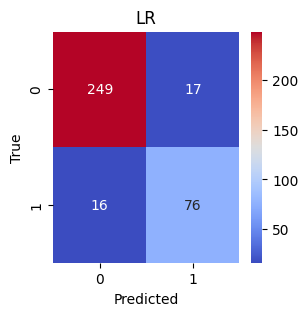

In [ ]:
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)
predictions_LR = LR.predict(X_test)

score('LR',y_test,predictions_LR)


# GaussianNB

Model: GNB

accuracy_LR: 90.78 %

Precision:  80.41 %
Recall score:  84.78 %
F1 Score: 82.54 %
ROC score:  88.82 %


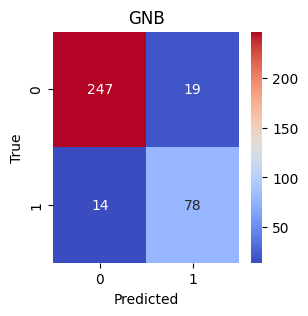

In [ ]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
predictions_GNB = GNB.predict(X_test)

score('GNB',y_test,predictions_GNB)

# Decision Tree Classifier

Model: DTC

accuracy_LR: 92.74 %

Precision:  85.11 %
Recall score:  86.96 %
F1 Score: 86.02 %
ROC score:  90.85 %


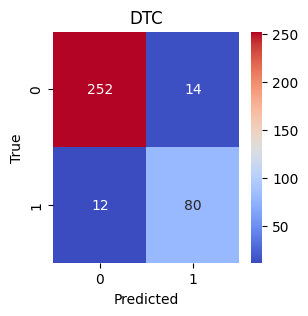

In [ ]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
predictions_DTC = DTC.predict(X_test)

score('DTC',y_test,predictions_DTC)

# Random Forest Classifier

Model: RandomForest

accuracy_LR: 94.69 %

Precision:  86.87 %
Recall score:  93.48 %
F1 Score: 90.05 %
ROC score:  94.3 %


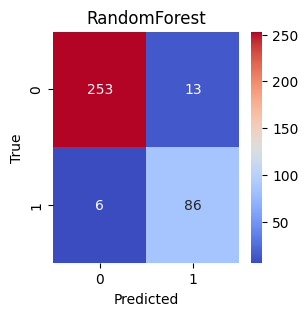

In [ ]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
predictions_RFC = RFC.predict(X_test)

score('RandomForest',y_test,predictions_RFC)

# SVC

Model: Support Vector Classifier

accuracy_LR: 91.62 %

Precision:  90.79 %
Recall score:  75.0 %
F1 Score: 82.14 %
ROC score:  86.18 %


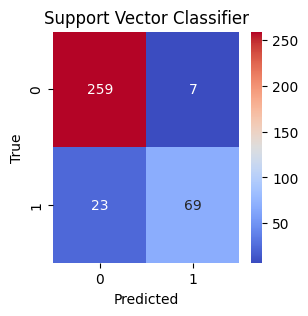

In [ ]:
svc = SVC(probability=True)
svc.fit(x_train, y_train)
predictions_SVC = svc.predict(x_test)  # Convert to binary predictions
score('Support Vector Classifier', y_test, predictions_SVC)

# Multinomial NB

Model: MNB

accuracy_LR: 81.01 %

Precision:  67.65 %
Recall score:  50.0 %
F1 Score: 57.5 %
ROC score:  70.86 %


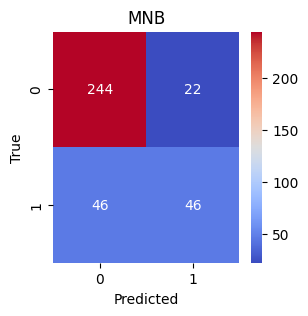

In [ ]:
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predictions_MNB = MNB.predict(X_test)

score('MNB',y_test,predictions_MNB)

# MLP Classifier

Model: MLP

accuracy_LR: 91.34 %

Precision:  77.98 %
Recall score:  92.39 %
F1 Score: 84.58 %
ROC score:  91.68 %


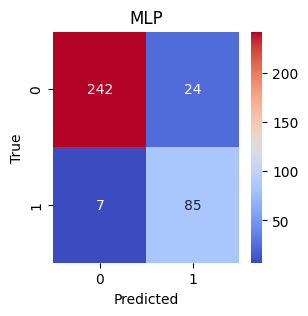

In [ ]:
MLP = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
MLP.fit(X_train, y_train)
predictions_MLP = MLP.predict(X_test)

score('MLP',y_test,predictions_MLP)

# Linear SVC

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model: LinearSVC

accuracy_LR: 79.33 %

Precision:  69.57 %
Recall score:  34.78 %
F1 Score: 46.38 %
ROC score:  64.76 %


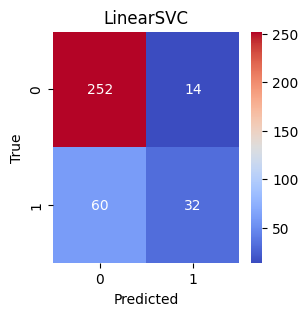

In [ ]:
LSVC = LinearSVC()
LSVC.fit(X_train, y_train)
predictions_LSVC = LSVC.predict(X_test)

score('LinearSVC',y_test,predictions_LSVC)

# K Neighbors Classifier

Model: KNN

accuracy_LR: 87.43 %

Precision:  79.01 %
Recall score:  69.57 %
F1 Score: 73.99 %
ROC score:  81.59 %


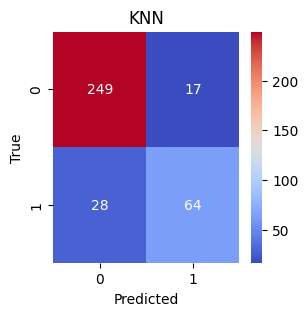

In [ ]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
predictions_KNN = KNN.predict(X_test)

score('KNN',y_test,predictions_KNN)

# Gradient Boosting

Model: GBC

accuracy_LR: 95.53 %

Precision:  88.0 %
Recall score:  95.65 %
F1 Score: 91.67 %
ROC score:  95.57 %


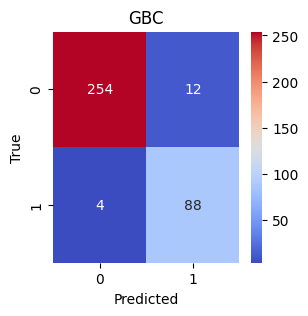

In [ ]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)
predictions_GBC = GBC.predict(X_test)

score('GBC',y_test,predictions_GBC)

# Extra Tree Classifier

Model: ETC

accuracy_LR: 94.69 %

Precision:  87.63 %
Recall score:  92.39 %
F1 Score: 89.95 %
ROC score:  93.94 %


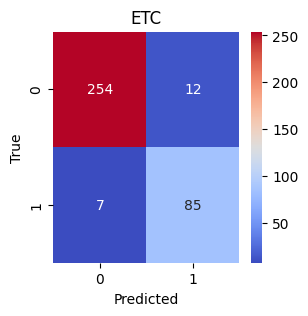

In [ ]:
ETC = ExtraTreesClassifier()
ETC.fit(X_train, y_train)
predictions_ETC = ETC.predict(X_test)

score('ETC',y_test,predictions_ETC)

# BernoulliNB

Model: BNB

accuracy_LR: 72.63 %

Precision:  46.94 %
Recall score:  50.0 %
F1 Score: 48.42 %
ROC score:  65.23 %


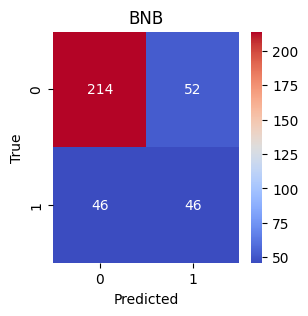

In [ ]:
BNB = BernoulliNB()
BNB.fit(X_train, y_train)
predictions_BNB = BNB.predict(X_test)

score('BNB',y_test,predictions_BNB)

# AdaBoost

Model: ABC

accuracy_LR: 92.74 %

Precision:  83.0 %
Recall score:  90.22 %
F1 Score: 86.46 %
ROC score:  91.91 %


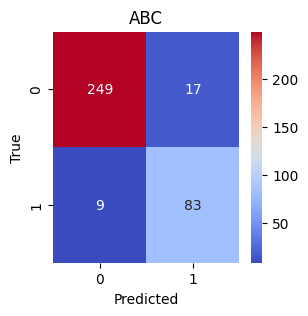

In [ ]:
ABC = AdaBoostClassifier()
ABC.fit(X_train, y_train)
predictions_ABC = ABC.predict(X_test)

score('ABC',y_test,predictions_ABC)

# Accuracy comparison

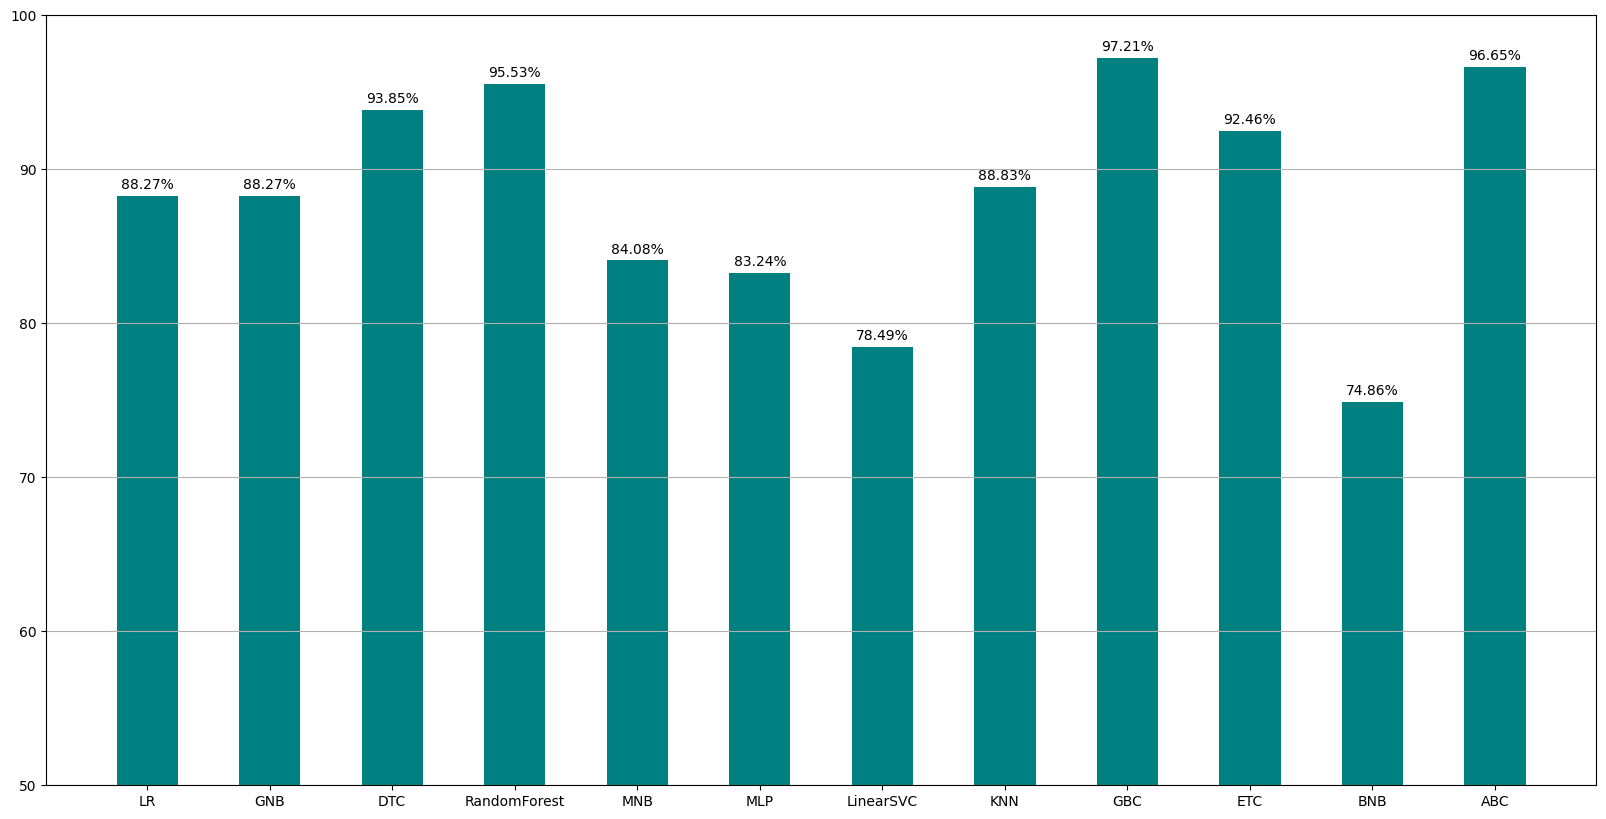

In [ ]:
plt.figure(figsize=(20, 10))
bars = plt.bar(models, accuracy, color='teal', width=0.5)
plt.ylim(50, 100)
plt.grid(True, axis='y')

# Add data labels (accuracy values) above each bar
for bar, acc in zip(bars, accuracy):
    height = bar.get_height()
    plt.annotate(f'{acc:.2f}%',  # Format accuracy to two decimal places
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # Offset label above the bar
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10)

plt.show()


#ROC

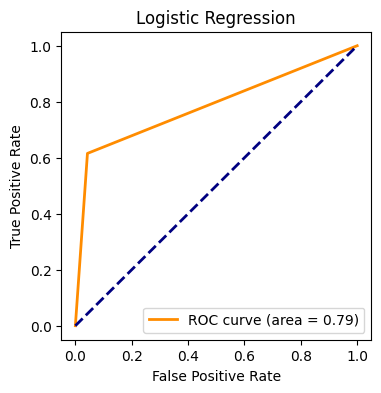

In [ ]:


# Logistic Regression
LR_fpr, LR_tpr, threshold = roc_curve(y_test, predictions_LR)
LR_auc = auc(LR_fpr, LR_tpr)
plt.figure(figsize=(4, 4), dpi=100)
plt.plot(LR_fpr, LR_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {LR_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.legend(loc="lower right")
plt.show()




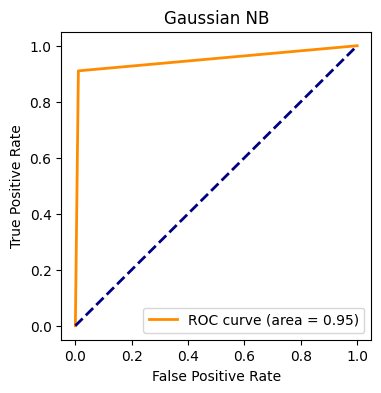

In [ ]:
# Gaussian NB
GBC_fpr, GBC_tpr, threshold = roc_curve(y_test, predictions_GBC)
GNB_auc = auc(GBC_fpr, GBC_tpr)
plt.figure(figsize=(4, 4), dpi=100)
plt.plot(GBC_fpr, GBC_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {GNB_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian NB')
plt.legend(loc="lower right")
plt.show()



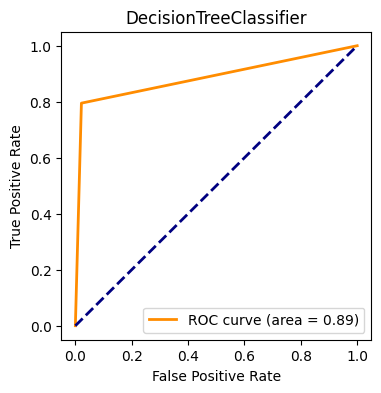

In [ ]:
# DecisionTreeClassifier
DTC_fpr, DTC_tpr, threshold = roc_curve(y_test, predictions_DTC)
DTC_auc = auc(DTC_fpr, DTC_tpr)
plt.figure(figsize=(4, 4), dpi=100)
plt.plot(DTC_fpr, DTC_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {DTC_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DecisionTreeClassifier')
plt.legend(loc="lower right")
plt.show()



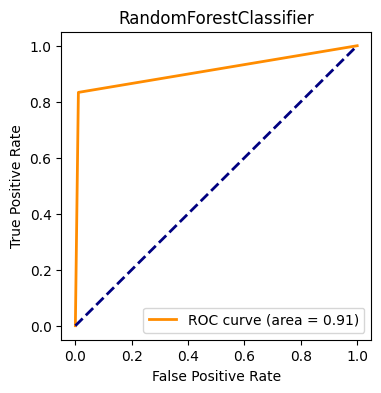

In [ ]:
# RandomForestClassifier
RFC_fpr, RFC_tpr, threshold = roc_curve(y_test, predictions_RFC)
RFC_auc = auc(RFC_fpr, RFC_tpr)
plt.figure(figsize=(4, 4), dpi=100)
plt.plot(RFC_fpr, RFC_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {RFC_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier')
plt.legend(loc="lower right")
plt.show()



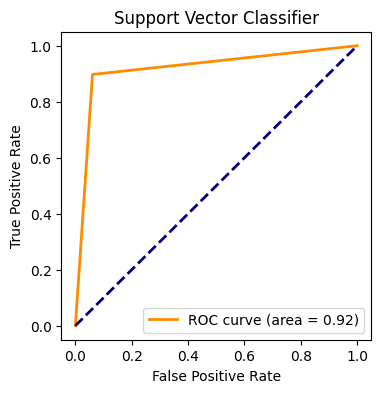

In [ ]:
# Support Vector Classifier
SVC_fpr, SVC_tpr, threshold = roc_curve(y_test, predictions_SVC)
SVC_auc = auc(SVC_fpr, SVC_tpr)
plt.figure(figsize=(4, 4), dpi=100)
plt.plot(SVC_fpr, SVC_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {SVC_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support Vector Classifier')
plt.legend(loc="lower right")
plt.show()


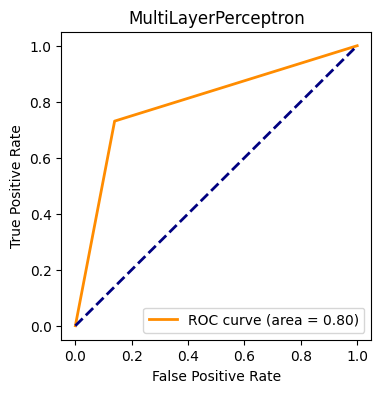

In [ ]:


# MultiLayerPerceptron
MLP_fpr, MLP_tpr, threshold = roc_curve(y_test, predictions_MLP)
MLP_auc = auc(MLP_fpr, MLP_tpr)
plt.figure(figsize=(4, 4), dpi=100)
plt.plot(MLP_fpr, MLP_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {MLP_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MultiLayerPerceptron')
plt.legend(loc="lower right")
plt.show()


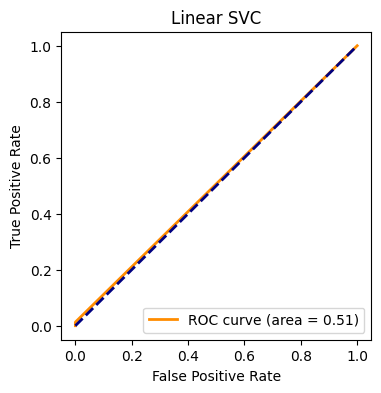

In [ ]:

# Linear SVC
LSVC_fpr, LSVC_tpr, threshold = roc_curve(y_test, predictions_LSVC)
LSVC_auc = auc(LSVC_fpr, LSVC_tpr)
plt.figure(figsize=(4, 4), dpi=100)
plt.plot(LSVC_fpr, LSVC_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {LSVC_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Linear SVC')
plt.legend(loc="lower right")
plt.show()


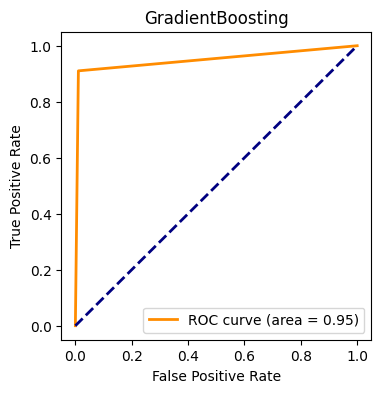

In [ ]:

# GradientBoosting
GBC_fpr, GBC_tpr, threshold = roc_curve(y_test, predictions_GBC)
GBC_auc = auc(GBC_fpr, GBC_tpr)
plt.figure(figsize=(4, 4), dpi=100)
plt.plot(GBC_fpr, GBC_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {GBC_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GradientBoosting')
plt.legend(loc="lower right")
plt.show()



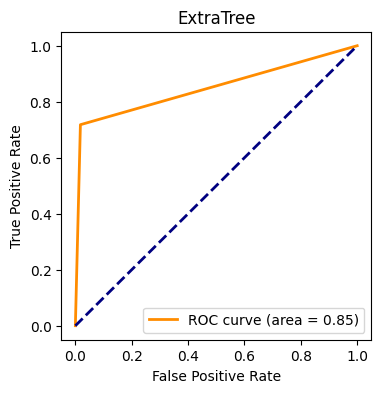

In [ ]:
# ExtraTreeClassifier
ETC_fpr, ETC_tpr, threshold = roc_curve(y_test, predictions_ETC)
ETC_auc = auc(ETC_fpr, ETC_tpr)
plt.figure(figsize=(4, 4), dpi=100)
plt.plot(ETC_fpr, ETC_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {ETC_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ExtraTree')
plt.legend(loc="lower right")
plt.show()



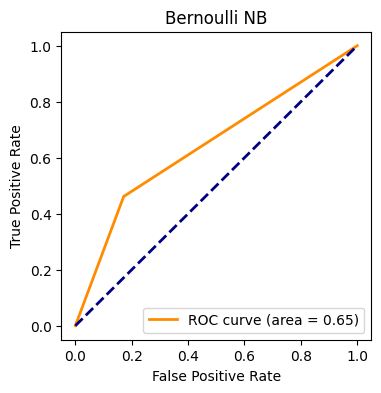

In [ ]:
# Bernoulli NB
BNB_fpr, BNB_tpr, threshold = roc_curve(y_test, predictions_BNB)
BNB_auc = auc(BNB_fpr, BNB_tpr)
plt.figure(figsize=(4, 4), dpi=100)
plt.plot(BNB_fpr, BNB_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {BNB_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bernoulli NB')
plt.legend(loc="lower right")
plt.show()



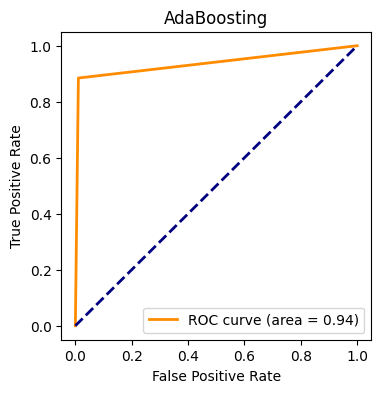

In [ ]:
# AdaBoosting
ABC_fpr, ABC_tpr, threshold = roc_curve(y_test, predictions_ABC)
ABC_auc = auc(ABC_fpr, ABC_tpr)
plt.figure(figsize=(4, 4), dpi=100)
plt.plot(ABC_fpr, ABC_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {ABC_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoosting')
plt.legend(loc="lower right")
plt.show()

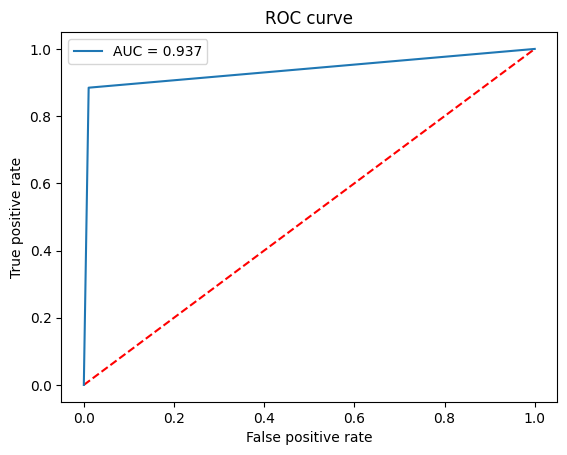

In [ ]:

# predictions_ABC_argmax = np.argmax(predictions_ABC, axis=1)

roc_log = roc_auc_score(y_test, predictions_ABC)
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, predictions_ABC)
area_under_curve = auc(false_positive_rate, true_positive_rate)

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = {:.3f}'.format(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()